<a href="https://colab.research.google.com/github/BIJIRAVI/WBC_Segmentaion/blob/master/Copy_of_02_SKLearn_V2_Model_Evaluation_and_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model Evaluation and More Classifiers Algorithms

### Learning Objectives
#### -Understand why accuracy only gives a partial picture of a classifier's performance.
#### -Understand the motivation and definition of important evaluation metrics in machine learning.

#### - Learn how to use a variety of evaluation metrics to evaluate supervised machine learning models
#### - Learn about choosing the right metric for selecting between models or for doing parameter tuning.

![image.png](attachment:image.png)

## Evaluation for Classification

* #####  Different applications have very different goals
* #####  Accuracy is widely used, but many others are possible, e.g.:
    - User satisfaction (Web search)
    - Amount of revenue (e-commerce)
    - Increase in patient survival rates (medical)

* #### It's very important to choose evaluation methods that match the goal of your application.
* #### Compute your selected evaluation metric for multiple different models.
* #### Then select the model with 'best' value of evaluation metric.

### Accuracy with imbalanced classes
* #### Suppose you have two classes:
        – Relevant (R):  the positive class
        – Not_Relevant(N): the negative class
* #### Out of 1000 randomly selected items, on average 
        – One item is relevant and has an R label
        – The rest of the items (999 of them) are not relevant and labelled N.
* #### Recall that:
        Accuracy =  #correct predictions / #total instance

* ####  You build a classifier to predict relevant items, and see that its accuracy on a test set is 99.9%. 
* ####  Wow!  Amazingly good, right?
* ####  For comparison, suppose we had a "dummy" classifier that didn't look at the features at all, and always just    blindly predicted the most frequent class (i.e. the negative N class).  

* ####  Assuming a test set of 1000 instances, what would this dummy classifier's accuracy be?
* ####  Answer:      

![image.png](attachment:image.png)

In [0]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [0]:
dataset.keys()

dict_keys(['DESCR', 'data', 'target', 'target_names', 'images'])

In [0]:
print(dataset.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [0]:
dataset.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
dataset.data.min()

0.0

In [0]:
dataset.data.mean()


4.8841645798553142

In [0]:
print(dataset.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [0]:
#dataset.target_names

In [0]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [0]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.90888888888888886

### Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [0]:
?DummyClassifier

In [0]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [0]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

 #### Dummy classifiers completely ignore the input data!
* #### Dummy classifiers serve as a sanity check on your classifier's performance.
* #### They provide a null metric(e.g. null accuracy) baseline.
* #### Dummy classifiers should not be used for real problems.
* #### Some commonly-used settings for the strategy parameter for DummyClassifier in  scikit-learn:
#####        – most_frequent: predicts the most frequent label in the training set.
#####        – stratified: random predictions based on training set class distribution.
#####        – uniform: generates predictions uniformly at random.
#####        – constant: always predicts a constant label provided by the user. 
######                     -> A major motivation of this method is F1-scoring, when the positive class is in the minority.

### What if my classifier accuracy is close to the null accuracy baseline?
* #### This could be a sign of:
#####    •  Ineffective, erroneous or missing features
#####    •  Poor choice of kernel or hyperparameter
#####    •  Large class imbalance

In [0]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.97777777777777775

### Dummy regressors
##### strategy parameter options:
        •mean: predicts the mean of the training targets.
        •median: predicts the median of the training targets.
        •quantile: predicts a user-provided quantile of the training targets.
        •constant: predicts a constant user-provided value

### Confusion matrices

![image.png](attachment:image.png)

![image.png](attachment:image.png)

#### Binary (two-class) confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [0]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[368  39]
 [ 36   7]]


In [0]:
dummy_classprop.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0,

In [0]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


In [0]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

### There is often a tradeoff between precision and recall
* #### Recall-oriented machine learning tasks:
        – Search and information extraction in legal discovery
        – Tumor detection
        – Often paired with a human expert to filter out false positives
* #### Precision-oriented machine learning tasks:
        – Search engine ranking, query suggestion
        – Document classification
        – Many customer-facing tasks (users remember failures!)

### F1-score: combining precision & recall into a single number

![image.png](attachment:image.png)

### F-score: generalizes F1-score for combining precision & recall into a single number

![image.png](attachment:image.png)

### Evaluation metrics for binary classification

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [0]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



In [0]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.91      0.90      0.91       407
          1       0.15      0.16      0.16        43

avg / total       0.84      0.83      0.84       450

SVM
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.88      0.88      0.88        43

avg / total       0.98      0.98      0.98       450

Logistic regression
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree
              precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



### Decision functions (decision_function)

* #### Each classifier score value per test point indicates how confidently the classifier predicts the positive class (large-magnitude positive values) or the negative class (large-magnitude negative values).
* #### Choosing a fixed decision threshold gives a classification rule.
* #### By sweeping the decision threshold through the entire range of possible score values, we get a series of classification outcomes that form a curve.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)


y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -23.172292973469549),
 (0, -13.542576515500066),
 (0, -21.717588760007864),
 (0, -18.903065133316442),
 (0, -19.733169947138638),
 (0, -9.7463217496747667),
 (1, 5.2327155658831117),
 (0, -19.308012306288916),
 (0, -25.099330209728528),
 (0, -21.824312362996),
 (0, -24.143782750720494),
 (0, -19.578811099762504),
 (0, -22.568371393280199),
 (0, -10.822590225240777),
 (0, -11.907918741521936),
 (0, -10.977026853802803),
 (1, 11.206811164226373),
 (0, -27.644157619807473),
 (0, -12.857692102545419),
 (0, -25.848149140240199)]

In [0]:
lr.fit(X_train, y_train).decision_function(X_test)

array([-23.17229297, -13.54257652, -21.71758876, -18.90306513,
       -19.73316995,  -9.74632175,   5.23271557, -19.30801231,
       -25.09933021, -21.82431236, -24.14378275, -19.5788111 ,
       -22.56837139, -10.82259023, -11.90791874, -10.97702685,
        11.20681116, -27.64415762, -12.8576921 , -25.84814914,
       -21.65049099, -12.20315016, -23.8560186 ,  -9.32480048,
       -30.92265617, -17.30615037, -16.89330406, -36.63275199,
       -31.39159941, -27.34262327, -16.7096164 , -26.49170182,
       -12.5625527 ,  -6.01975578, -12.94616414, -20.33983928,
       -22.16927847,  -1.87131487, -18.02965243,  14.73832302,
        -7.57229377, -11.58689251, -25.85995176, -29.340968  ,
        -1.3051061 , -28.76101329, -26.07350941, -18.65804816,
       -20.65230723,   5.73378353, -25.95819302,  -7.95474475,
       -24.00692991, -24.21825261, -30.1620186 , -28.58278782,
        -9.11423973,  -1.72691524, -26.92898626, -27.58402881,
       -14.07372922,  -6.92639302, -11.26305908, -15.50

### Predicted Probability of Class Membership (predict_proba)
* #### Typical rule: choose most likely class
        – e.g class 1 if threshold > 0.50.
* #### Adjusting threshold affects predictions of classifier.
* #### Higher threshold results in a more conservative classifier
        – e.g. only predict Class 1 if estimated probability of class 1 is above 70%  
        – This increases precision. Doesn't predict class 1 as often, but when it does,it gets high proportion of    class 1 instances correct.
* #### Not all models provide realistic probability estimates

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 8.6377579220606466e-11),
 (0, 1.3138118599563736e-06),
 (0, 3.6997386039099659e-10),
 (0, 6.1730972504865241e-09),
 (0, 2.6914925394345074e-09),
 (0, 5.8506057771143608e-05),
 (1, 0.99468934644404694),
 (0, 4.1175302368500096e-09),
 (0, 1.2574750894253029e-11),
 (0, 3.3252290754668869e-10),
 (0, 3.269552979937297e-11),
 (0, 3.1407283576084996e-09),
 (0, 1.5800864117150149e-10),
 (0, 1.9943442430612578e-05),
 (0, 6.7368003023859777e-06),
 (0, 1.7089540581641637e-05),
 (1, 0.9999864188091131),
 (0, 9.8694940340196163e-13),
 (0, 2.6059983600823614e-06),
 (0, 5.9469113009063784e-12)]

![image.png](attachment:image.png)

### Precision-recall curves

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


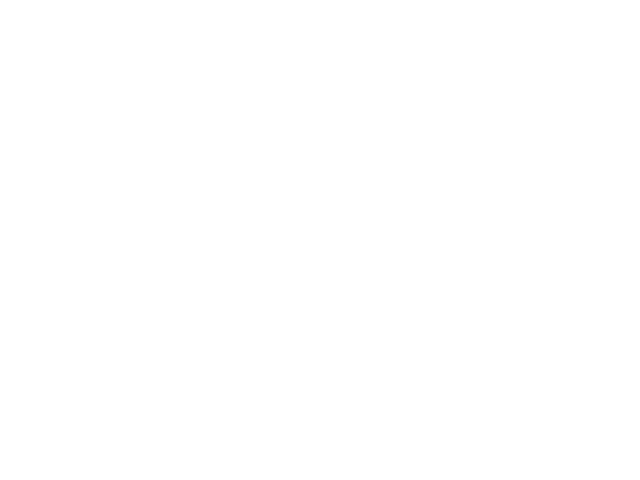

In [0]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
#plt.plot(1.0, 0.209302, 'o', markersize = 12, fillstyle = 'none', c='b', mew=3)

plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

### ROC curves, Area-Under-Curve (AUC)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


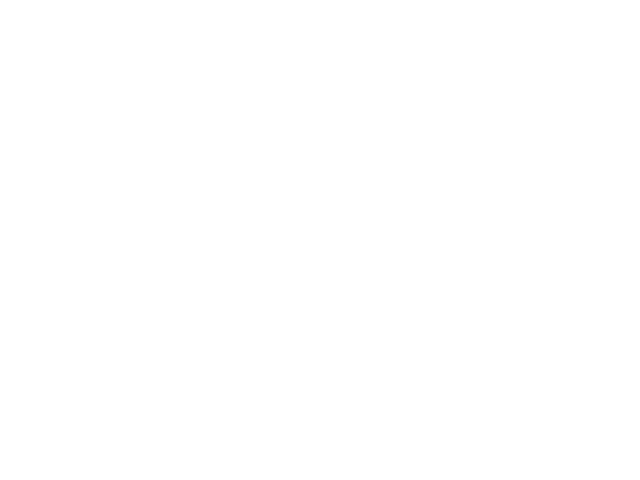

In [0]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


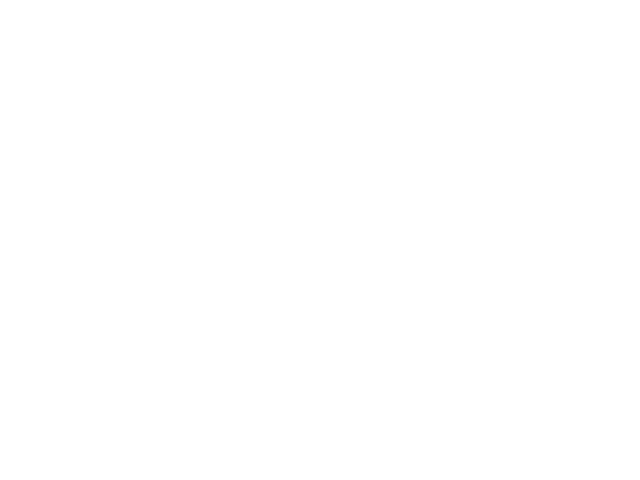

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


In [0]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Evaluation measures for multi-class classification

### Multi-Class Evaluation
* #### Multi-class evaluation is an extension of  the binary case.
        – A collection of true vs predicted binary outcomes, one per class
        – Confusion matrices are especially useful
        – Classification report
* #### Overall evaluation metrics are averages across classes
        – But there are different ways to average multi-class results: we will cover these shortly.
        – The support (number of instances) for each class is important to consider, e.g. in case of imbalanced             classes
* #### Multi-label classification: each instance can have multiple labels (not covered here)

#### Multi-class confusion matrix

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


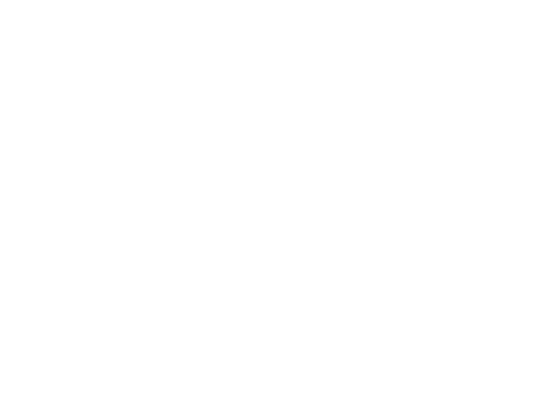

<IPython.core.display.Javascript object>


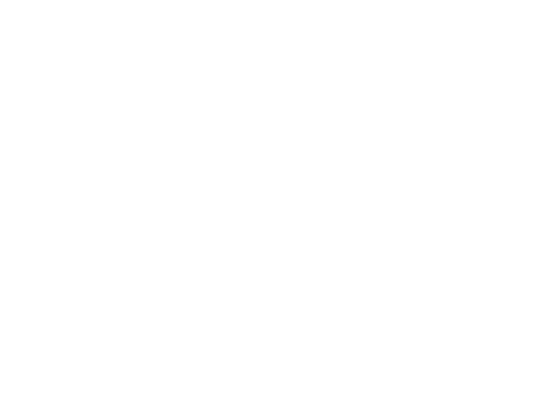

In [0]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Multi-class classification report

In [0]:
print(classification_report(y_test_mc, svm_predicted_mc))

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



#### Micro- vs. macro-averaged metrics

![image.png](attachment:image.png)

![image.png](attachment:image.png)

### Macro-Average vs Micro-Average
* #### If the classes have about the same number of instances, macro-and micro-average will be about the same.
* #### If some classes are much larger (more instances) than others, and you want to:
            – Weight your metric toward the largest ones, use micro-averaging.
            – Weight your metric toward the smallest ones, use macro-averaging.
* #### If the micro-average is much lower than the macro-average then examine the larger classes for poor metric performance.
* #### If the macro-average is much lower than the micro-averagethen examine the smaller classes for poor metric performance. 

### Multi-class Evaluation Metrics via the "Average" Parameter for a Scoring Function
* #### Micro:  Metric on aggregated instances
* #### Macro: Mean per-class metric, classes have equal weight
* #### Weighted:   Mean per-class metric, weighted by support
* #### Samples: for multi-label problems only 

In [0]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.49 (treat instances equally)
Macro-averaged precision = 0.91 (treat classes equally)


In [0]:
?precision_score

In [0]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.49 (treat instances equally)
Macro-averaged f1 = 0.54 (treat classes equally)


### Regression evaluation metrics

### Regression metrics
* #### Typically r2_score is enough
        – Reminder: computes how well future instances will be predicted
        – Best possible score is 1.0
        – Constant prediction score is 0.0
* #### Alternative metrics include:
        – mean_absolute_error(absolute difference of target & predicted values)
        – mean_squared_error(squared difference of target & predicted values)
        – median_absolute_error(robust to outliers)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


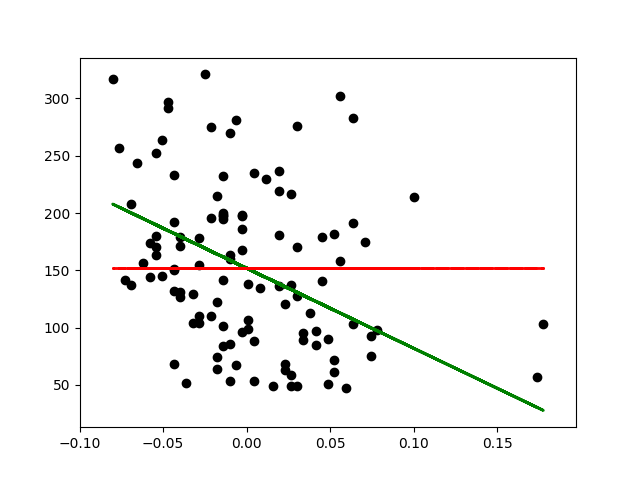

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

![image.png](attachment:image.png)

In [0]:
r2_score(y_test, y_predict_dummy_mean)

-0.00014359578276068596

### Model selection using evaluation metrics

### Model Selection Using Evaluation Metrics
* #### Train/test on same data
        – Single metric.
        – Typically overfits and likely won't generalize well to new data.
        – But can serve as a sanity check: low accuracy on the training set may indicate an implementation problem.
* #### Single train/test split
        – Single metric.
        – Speed and simplicity.
        – Lack of variance information
* #### K-fold cross-validation
        – K train-test splits.
        – Average metric over all splits.
        – Can be combined with parameter grid search: GridSearchCV(def. cv = 3)

#### Cross-validation example

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [ 0.91944444  0.98611111  0.97214485  0.97493036  0.96935933]
Cross-validation (AUC) [ 0.9641871   0.9976571   0.99372205  0.99699002  0.98675611]
Cross-validation (recall) [ 0.81081081  0.89189189  0.83333333  0.83333333  0.83333333]


#### Grid search example

array([False,  True, False, ..., False, False, False], dtype=bool)

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.996288047513
Test set AUC:  0.999828581224
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.99987412783


#### Evaluation metrics supported for model selection

In [0]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


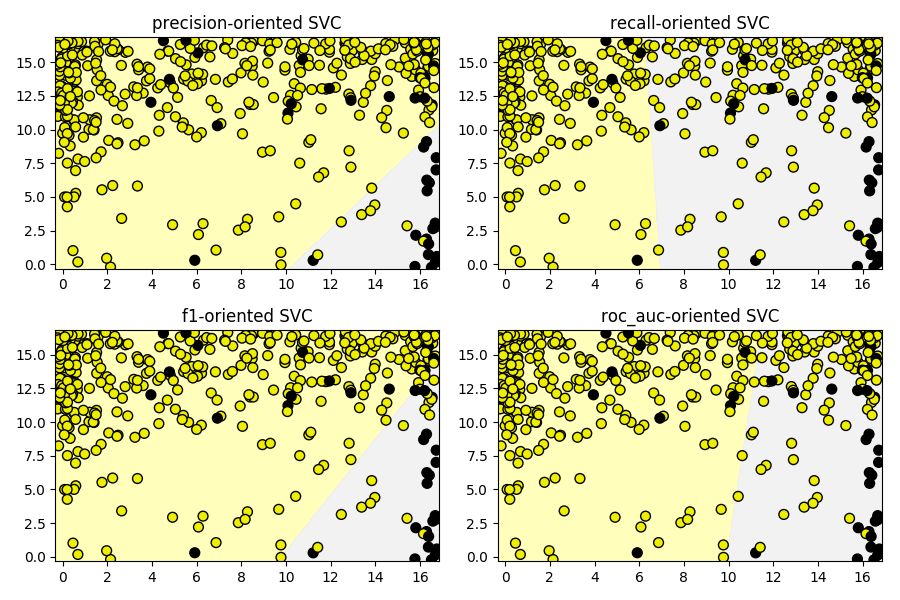

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5444327991033088
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9283988058569872
Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.5073151994710762
Grid best parameter (max. roc_auc): {'class_weight': {1: 10}}
Grid best score (roc_auc): 0.8916889609632486


In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

![image.png](attachment:image.png)

#### Precision-recall curve for the default SVC classifier (with balanced class weights)

<IPython.core.display.Javascript object>


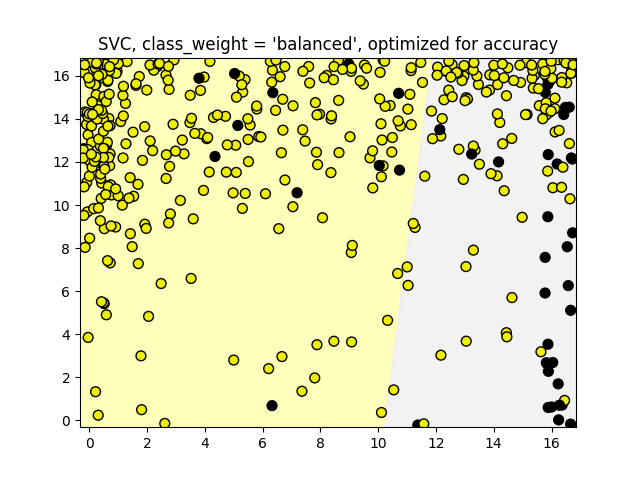

<IPython.core.display.Javascript object>


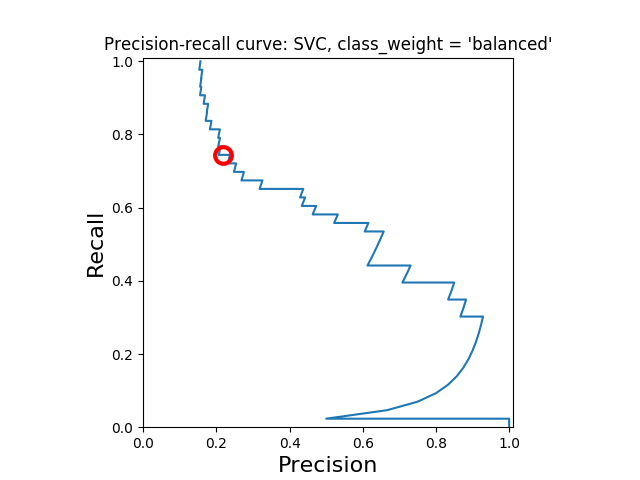

At zero threshold, precision: 0.22, recall: 0.74


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))

### Training, Validation, and Test Framework for Model Selection and Evaluation
* #### Using only cross-validation or a test set to do model selection may lead to more subtle overfitting / optimistic generalization estimates
* ####  Instead, use three data splits:
            1. Training set (model building)
            2. Validation set (model selection)
            3. Test set (final evaluation)
* #### In practice:
            – Create an initial training/test split
            – Do cross-validation on the training data for model/parameter selection
            – Save the held-out test set for final model evaluation

### Concluding Notes
* #### Accuracy is often not the right evaluation metric for many real-world machine learning tasks
            – False positives and false negatives may need to be treated very differently
            – Make sure you understand the needs of your application and choose an evaluation metric that matches your application, user, or business goals.
* #### Examples of additional evaluation methods include:
            – Learning curve: How much does accuracy (or other metric) change as a function of the amount of training data?
            –Sensitivity analysis:  How much does accuracy (or other metric) change as a function of key learning          parameter values?

### Supervised Learning, Continued

## Fetching Datasets

<IPython.core.display.Javascript object>


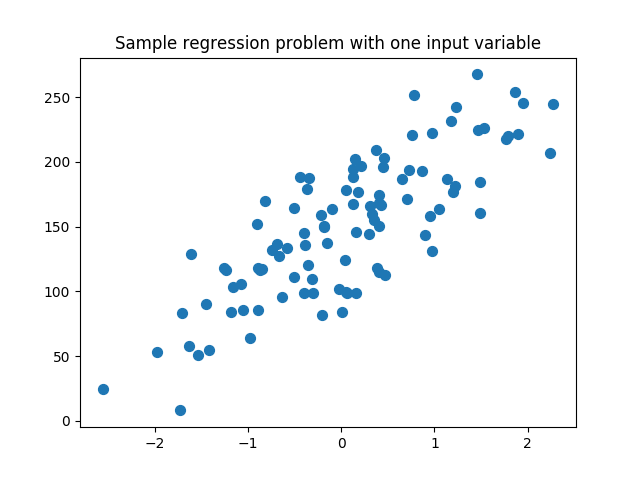

<IPython.core.display.Javascript object>


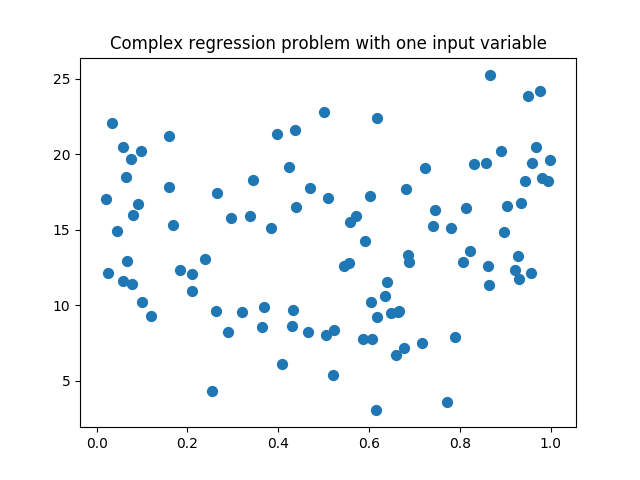

<IPython.core.display.Javascript object>


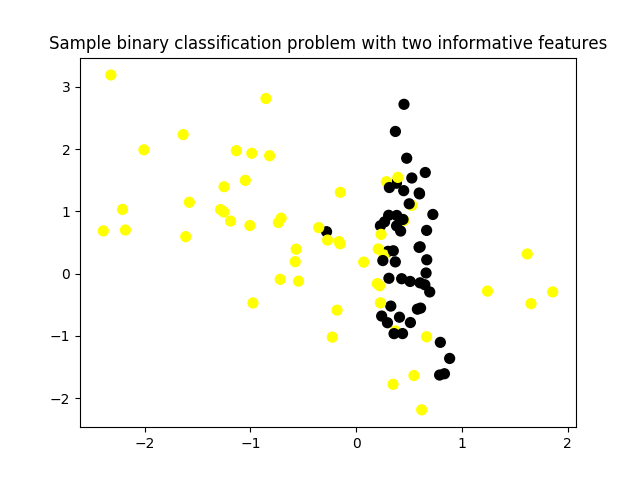

<IPython.core.display.Javascript object>


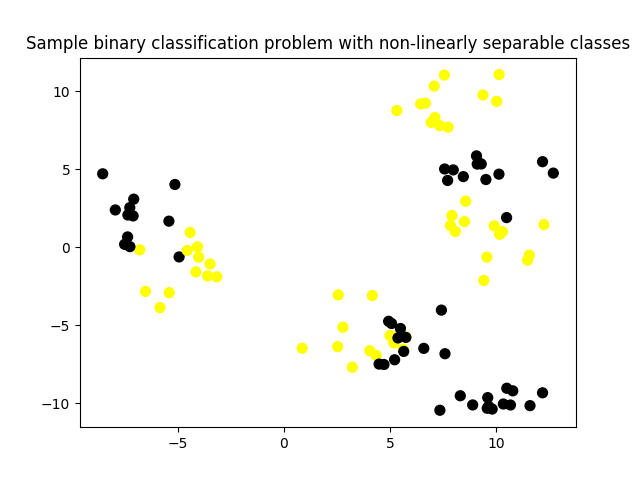

In [0]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

## Naive Bayes classifiers

### Naïve Bayes Classifiers: a simple, probabilistic classifier family
* #### These classifiers are called 'Naïve' because they assume that features are conditionally independent, given the class.
* #### In other words: they assume that, for all instances of a given class, the features have little/no correlation with each other.
* #### Highly efficient learning and prediction.
* #### But generalization performance may worse than more sophisticated learning methods.
* #### Can be competitive for some tasks.

### Naïve Bayes classifier types
* #### Bernoulli:  binary features (e.g. word presence/absence)
* #### Multinomial:  discrete features (e.g. word counts)
* #### Gaussian: continuous/real-valued features
            – Statistics computed for each class:
                • For each feature:   mean,  standard deviation
* #### See the Applied Text Mining course for more details on the Bernoulli and Multinomial Naïve Bayes models

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


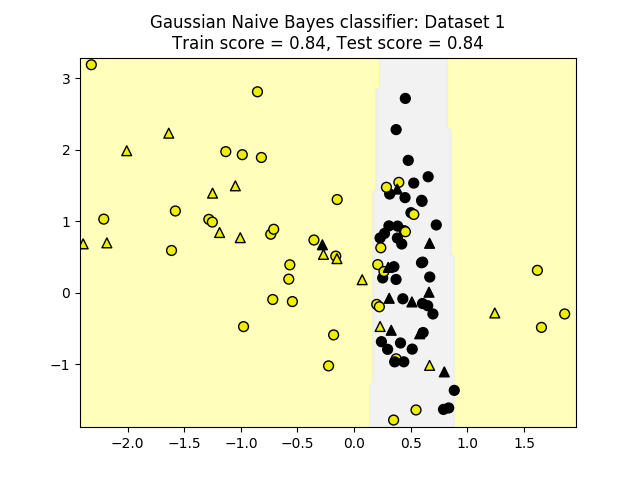

In [0]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

<IPython.core.display.Javascript object>


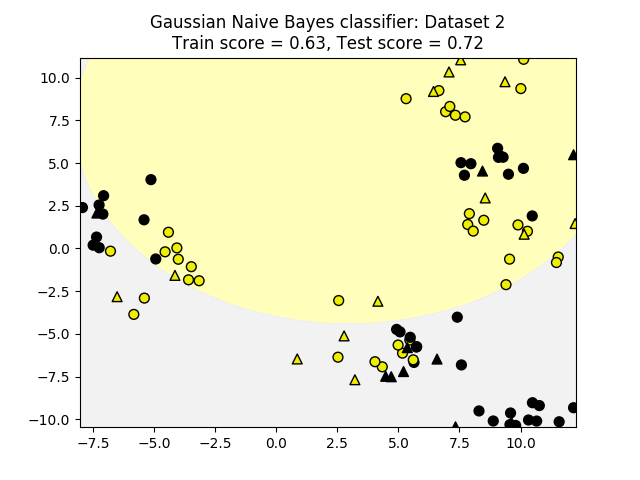

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 2')

### Application to a real-world dataset

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


### Naïve Bayes classifiers: Pros and Cons
#### Pros:
* ##### Easy to understand
* ##### Simple, efficient parameter estimation
* ##### Works well with high-dimensional data
* ##### Often useful as a baseline comparison against more sophisticated methods
#### Cons:
* ##### Assumption that features are conditionally independent given the class is not realistic.
* ##### As a result, other classifier types often have better generalization performance.
* ##### Their confidence estimates for predictions are not very accurate.

## Ensembles of Decision Trees

### Random forests

* #### An ensemble of trees, not just one tree.
* #### Widely used, very good results on many problems.
* #### sklearn.ensemble module:
            – Classification: RandomForestClassifier
            – Regression: RandomForestRegressor
* #### One decision tree → Prone to overfitting
* #### Many decision trees → More stable, better generalization
* #### Ensemble of trees should be diverse: introduce random variation into tree-building.


![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

### Random Forest max_features Parameter
* #### Learning is quite sensitive to max_features
* #### Setting max_features= 1 leads to forests with diverse, more complex trees.
* #### Setting max_features= < close to number of features> will lead to similar forests with simpler trees.

![image.png](attachment:image.png)

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


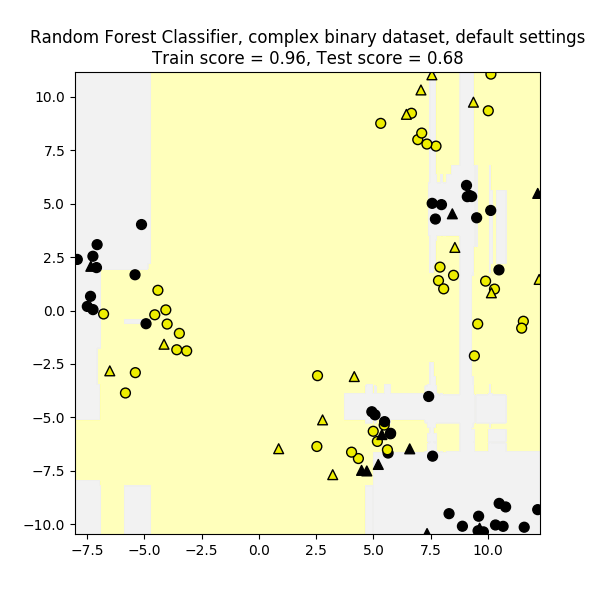

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

<IPython.core.display.Javascript object>


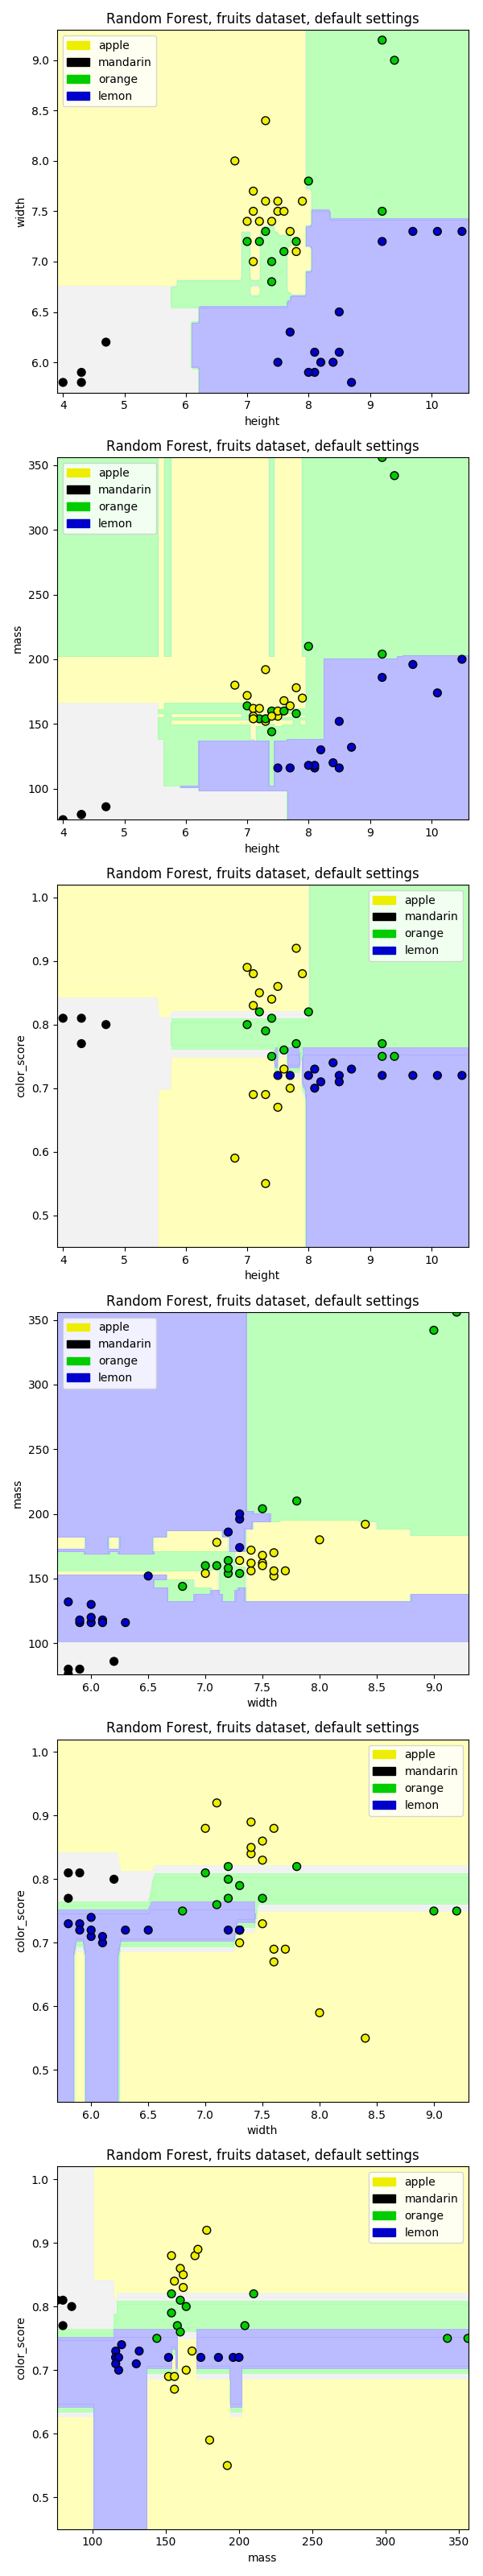

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Random Forests on a real-world dataset

In [0]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.99


### Random Forest: Pros and Cons
#### Pros:
* ##### Widely used, excellent prediction performance on many problems.
* ##### Doesn't require careful normalization of features or extensive parameter tuning.
* ##### Like decision trees, handles a mixture of feature types.
* ##### Easily parallelized across multiple CPUs.
#### Cons:
* ##### The resulting models are often difficult for humans to interpret.
* ##### Like decision trees, random forests may not be a good choice for very high-dimensional tasks (e.g. text classifiers) compared to fast, accurate linear models.

### Random Forests: RandomForestClassifier Key Parameters
* #### n_estimators: number of trees to use in ensemble (default: 10).
            – Should be larger for larger datasets to reduce overfitting(but uses more computation).
* #### max_features: has a strong effect on performance.  Influences the diversity of trees in the forest.
            – Default works well in practice, but adjusting may lead to some further gains.
* #### max_depth: controls the depth of each tree (default: None. Splits until all leaves are pure).
* #### n_jobs: How many cores to use in parallel during training.
* #### Choose a fixed setting for the random_state parameter if you need reproducible results.

### Gradient-boosted decision trees

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


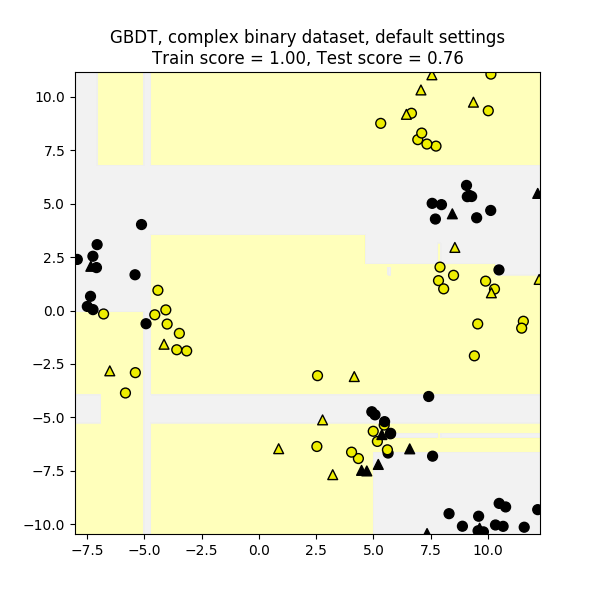

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

#### Gradient boosted decision trees on the fruit dataset

<IPython.core.display.Javascript object>


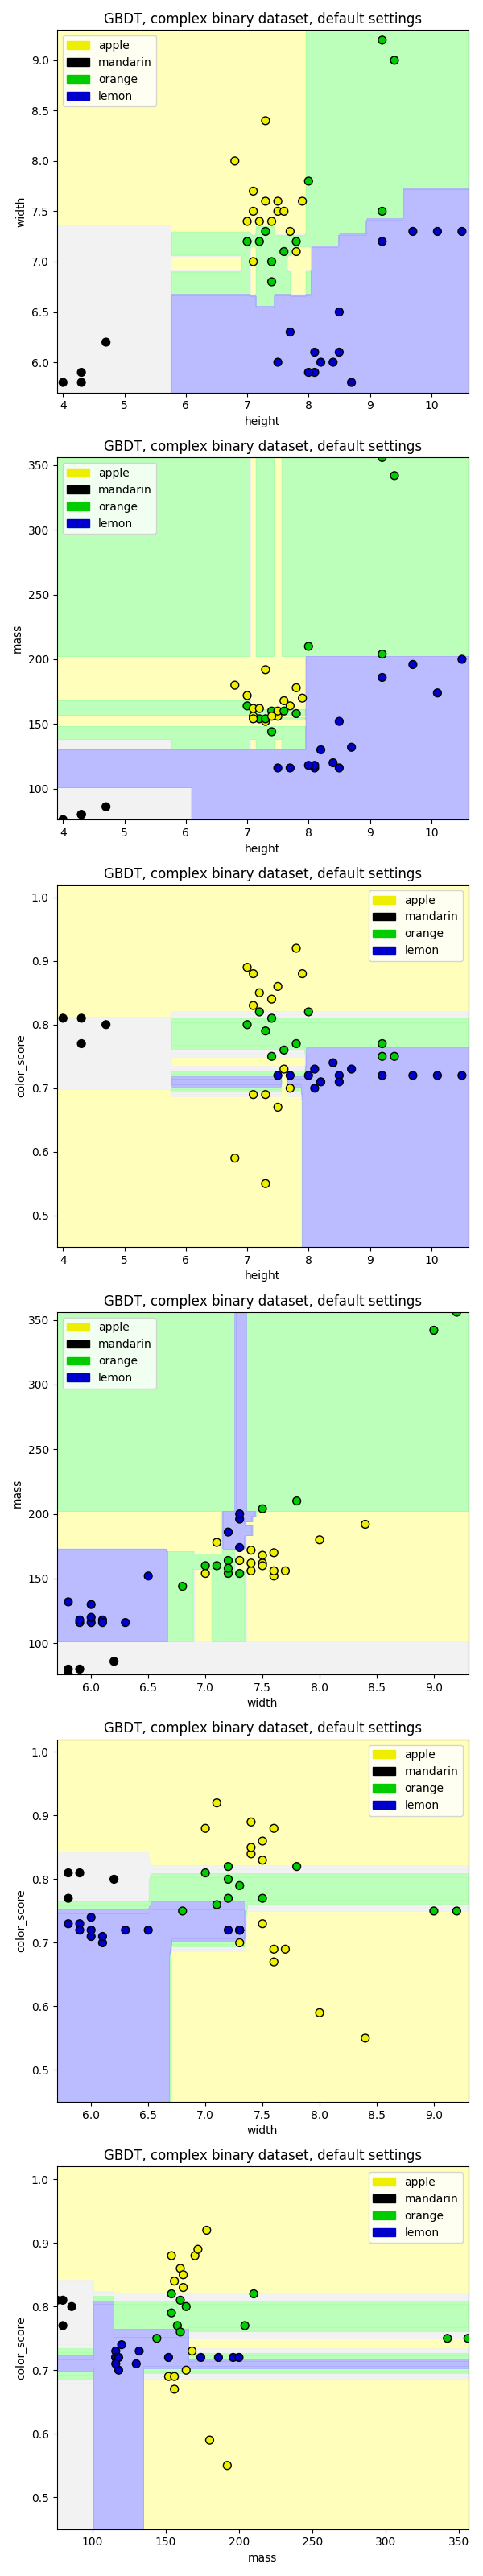

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Gradient-boosted decision trees on a real-world dataset

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.96

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


### GBDT: Pros and Cons
#### Pros:
* ##### Often best off-the-shelf accuracy on many problems.
* ##### Using model for prediction requires only modest memory and is fast.
* ##### Doesn't require careful normalization of features to perform well.
* ##### Like decision trees, handles a mixture of feature types.
#### Cons:
* ##### Like random forests, the models are often difficult for humans to interpret.
* ##### Requires careful tuning of the learning rate and other parameters.
* ##### Training can require significant computation.
* ##### Like decision trees, not recommended for text classification and other problems with very high dimensional sparse  features, for accuracy and computational cost reasons.

### GBDT: GradientBoostingClassifier Key Parameters 
* #### n_estimators: sets # of small decision trees to use (weak learners) in the ensemble.
* #### learning_rate : controls emphasis on fixing errors from previous iteration.
* #### The above two are typically tuned together.
* #### n_estimators is adjusted first, to best exploit memory and CPUs during training, then other parameters.
* #### max_depth is typically set to a small value (e.g. 3-5) for most applications.

## Neural networks

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

#### Activation functions

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


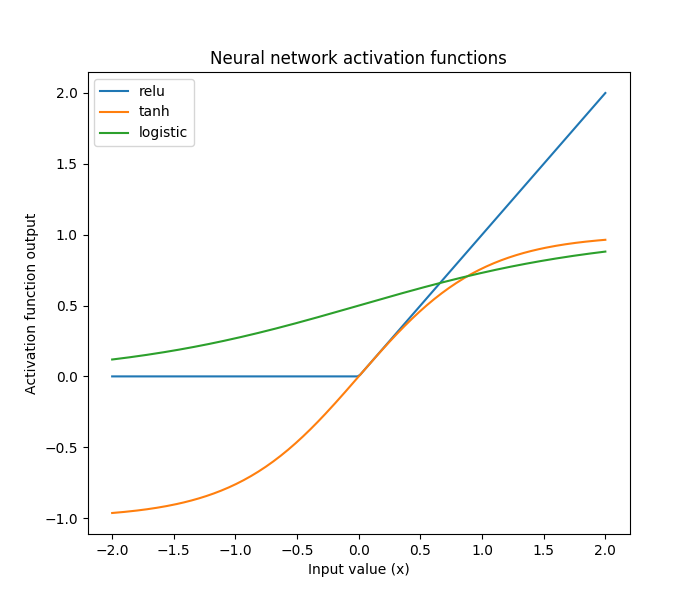

In [0]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

### Neural networks: Classification

#### Synthetic dataset 1: single hidden layer

![image.png](attachment:image.png)

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


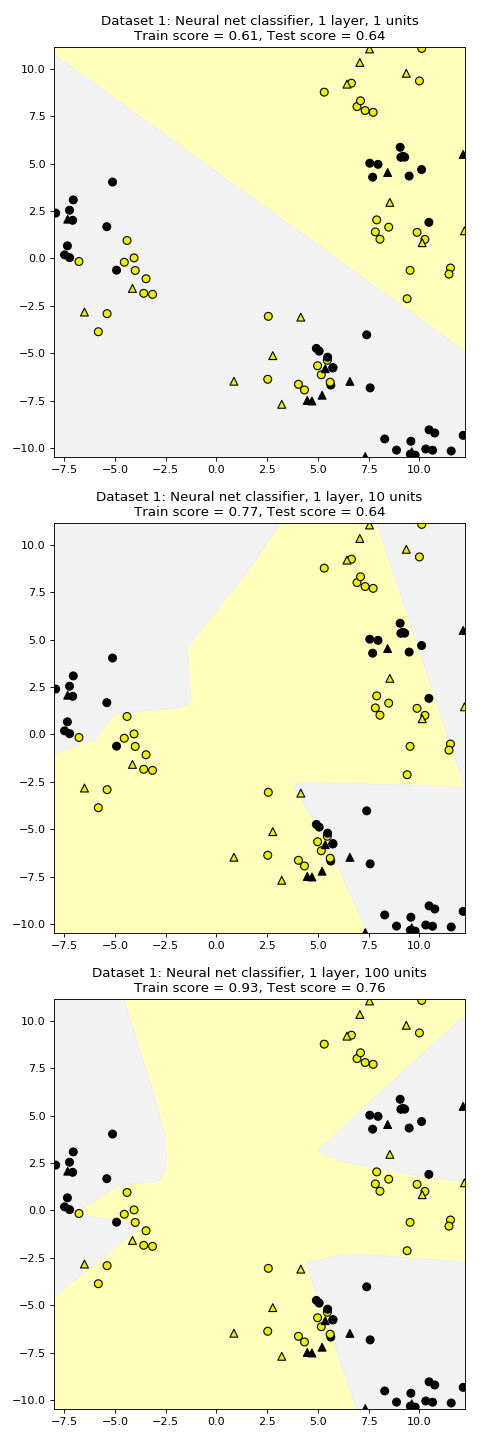

In [0]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

#### Synthetic dataset 1: two hidden layers

<IPython.core.display.Javascript object>


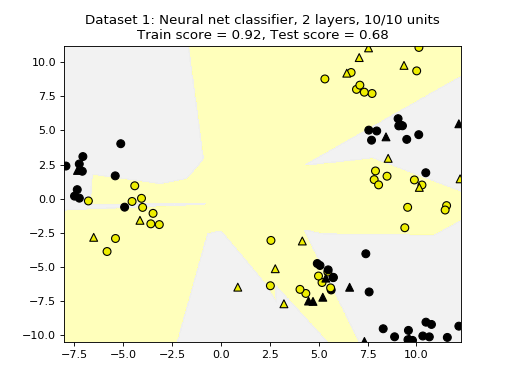

In [0]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

![image.png](attachment:image.png)

#### Regularization parameter: alpha

<IPython.core.display.Javascript object>


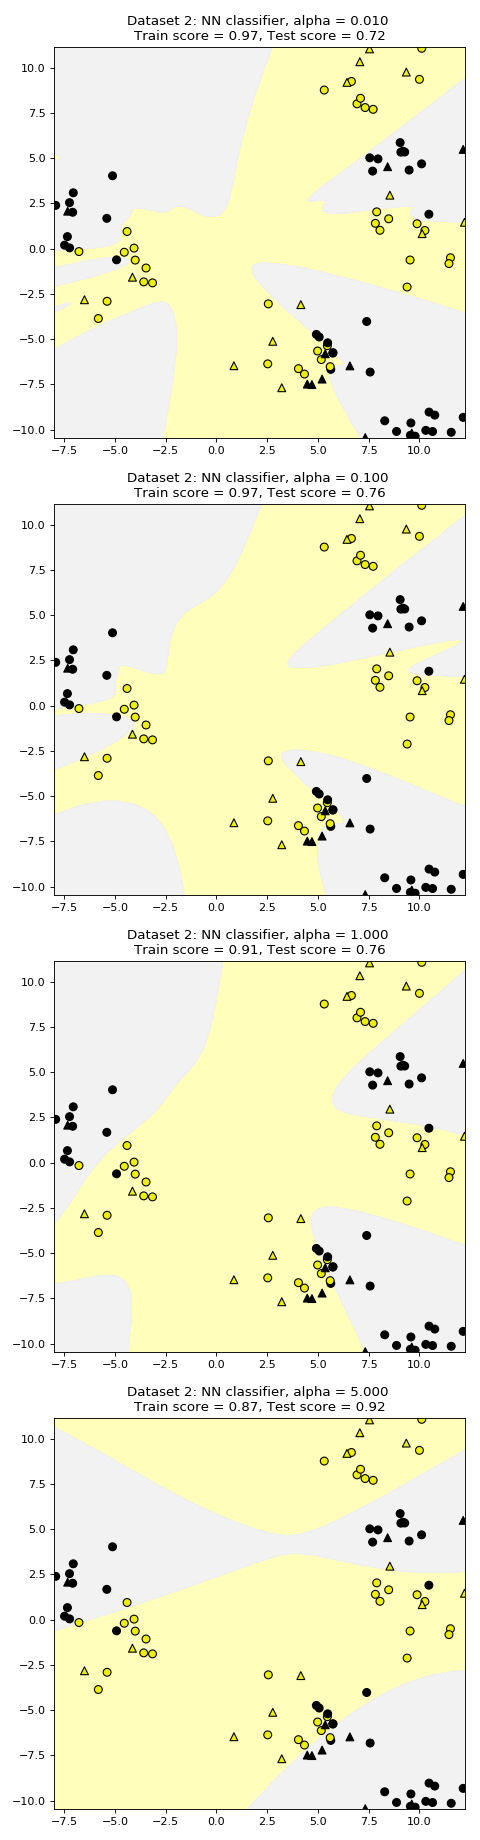

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    

![image.png](attachment:image.png)

#### The effect of different choices of activation function

<IPython.core.display.Javascript object>


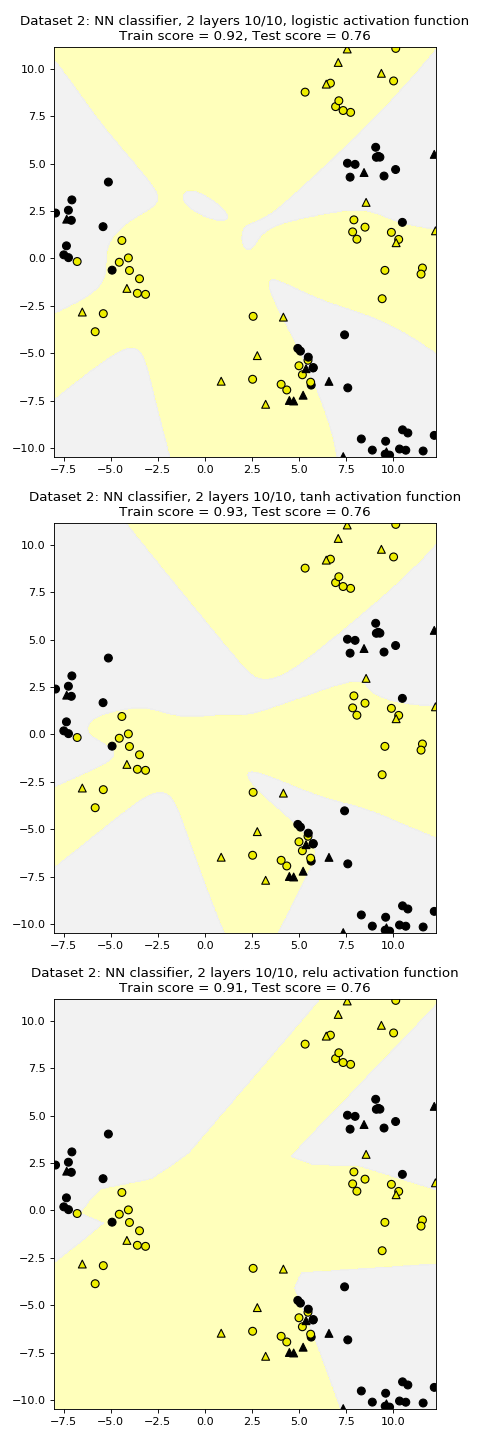

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = this_activation,
                         alpha = 0.1, hidden_layer_sizes = [10, 10],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

#### Application to real-world dataset for classification

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.97


### Neural networks: Regression

<IPython.core.display.Javascript object>


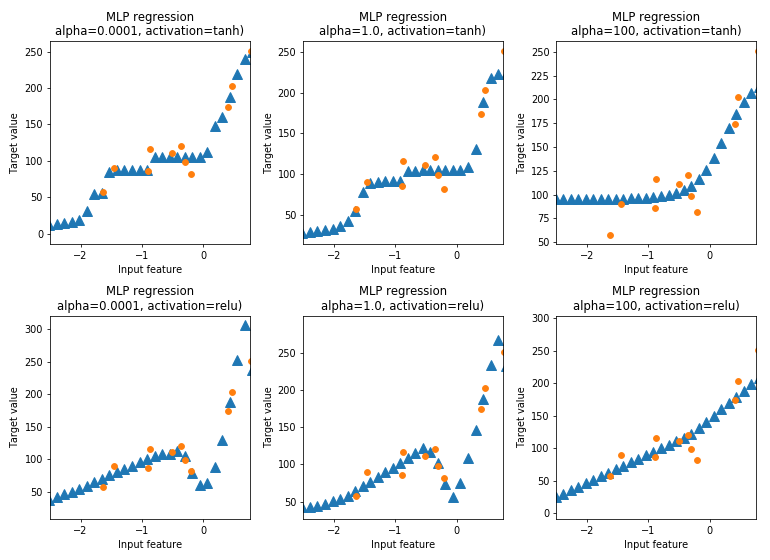

In [0]:
from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

![image.png](attachment:image.png)

### Neural Networks: Pros and Cons
#### Pros:
* ##### They form the basis of state-of-the-art models and can be formed into advanced architectures that effectively capture complex features given enough data and computation.
#### Cons:
* ##### Larger, more complex models require significant training time, data, and customization.
* ##### Careful preprocessing of the data is needed.
* ##### A good choice when the features are of similar types, but less so when features of very different types.

### Neural Nets: MLPClassifier and MLPRegressor
#### Important Parameters
* ##### hidden_layer_sizes: sets the number of hidden layers (number of elements in list), and number of hidden units per layer (each list element). Default:(100).
* ##### alpha: controls weight on the regularization penalty that shrinks weights to zero. Default: alpha = 0.0001.
* ##### activation:controls the nonlinear function used for the activation function, including:'relu'(default), 'logistic', 'tanh'.

### Deep Learning Summary
* #### Deep learning architectures combine a sophisticated automatic feature extraction phase with a supervised learning phase.
* #### The feature extraction phase uses a hierarchy of multiple feature extraction layers.
* #### Starting from primitive, low-level features in the initial layer, each feature layer's output provides the input features to the next higher feature layer.
* #### All features are used in the final supervised learning model.

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

### Pros and Cons of Deep Learning
* #### Pros:
            – Powerful: deep learning has achieved significant gains over other machine learning approaches on many difficult learning tasks, leading to state-of-the-art performance across many different domains.
            – Does effective automatic feature extraction, reducing the need for guesswork and heuristics on this key problem.
            – Current software provides flexible architectures that can be adapted for new domains fairly easily.
* #### Cons:
            – Can require huge amounts of training data.
            – Can require huge amounts of computing power.
            – Architectures can be complex and often must be highly tailored to a specific application.
            – The resulting models may not be easily interpretable.

### Deep learning software for Python
* #### Keras https://keras.io/
* #### Lasagne https://lasagne.readthedocs.io/en/latest/
* #### TensorFlow https://www.tensorflow.org/
* #### Theano http://deeplearning.net/software/theano/
* #### Libraries support high-performance computation via GPUs.

## Unsupervised Learning

## Introduction: Unsupervised Learning
* #### Unsupervised learning involves tasks that operate on datasets without labeled responses or target values.
* #### Instead, the goal is to capture interesting structure or information.
### Applications of unsupervised learning:
* #### Visualize structure of a complex dataset.
* #### Density estimation to predict probabilities of events.
* #### Compress and summarize the data.
* #### Extract features for supervised learning.
* #### Discover important clusters or outliers

![image.png](attachment:image.png)

### Two major types of unsupervised learning methods
* #### Transformations
            – Processes that extract or compute information
* #### Clustering
            – Find groups in the data
            – Assign every point in the dataset to one of the groups

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

## Fetching Datasets

In [0]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

## Dimensionality Reduction and Manifold Learning

![image.png](attachment:image.png)

### Principal Components Analysis (PCA)

![image.png](attachment:image.png)

#### Using PCA to find the first two principal components of the breast cancer dataset

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


In [0]:
X_pca[0:5]

array([[  9.19283683,   1.94858307],
       [  2.3878018 ,  -3.76817174],
       [  5.73389628,  -1.0751738 ],
       [  7.1229532 ,  10.27558912],
       [  3.93530207,  -1.94807157]])

#### Plotting the PCA-transformed version of the breast cancer dataset

<IPython.core.display.Javascript object>


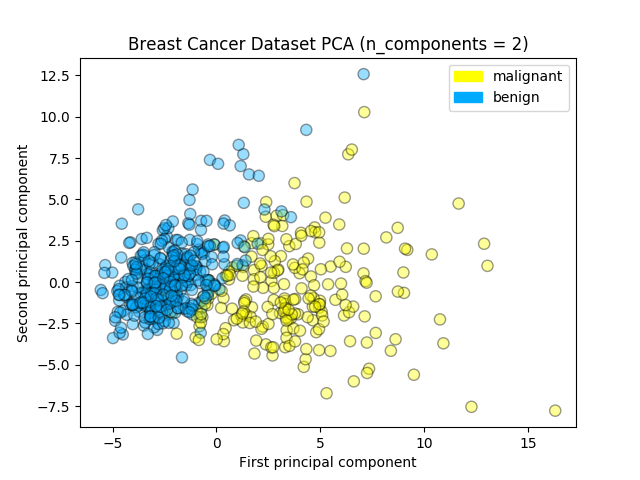

In [0]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

#### Plotting the magnitude of each feature value for the first two principal components

<IPython.core.display.Javascript object>


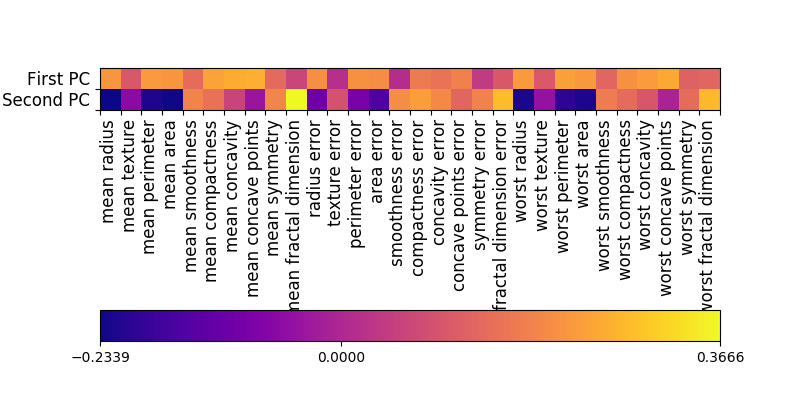

In [0]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

In [0]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

#### PCA on the fruit dataset (for comparison)

<IPython.core.display.Javascript object>


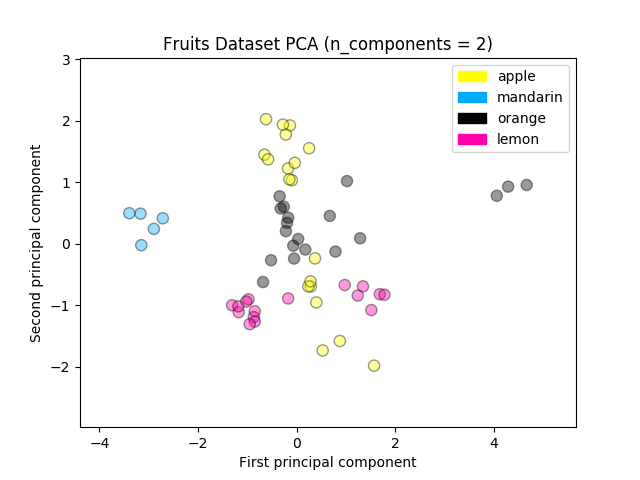

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_fruits, ['apple','mandarin','orange','lemon'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');

### Manifold learning methods

![image.png](attachment:image.png)

#### Multidimensional scaling (MDS) on the fruit dataset

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


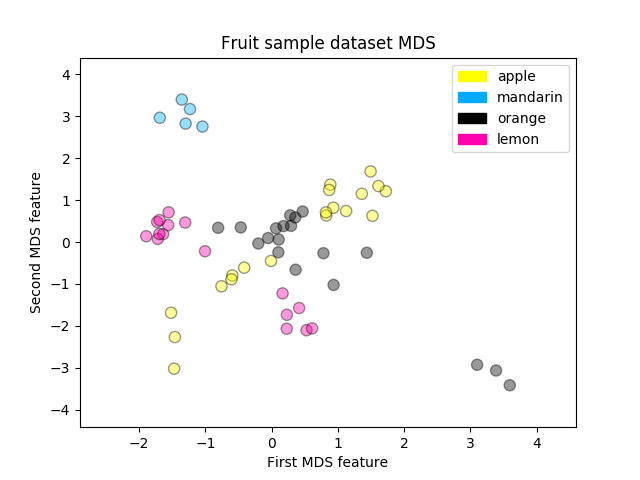

In [0]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

#### Multidimensional scaling (MDS) on the breast cancer dataset

<IPython.core.display.Javascript object>


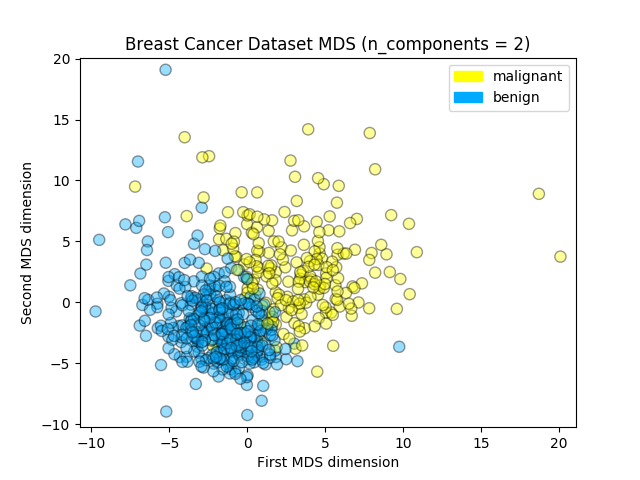

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

#### t-SNE on the fruit dataset

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


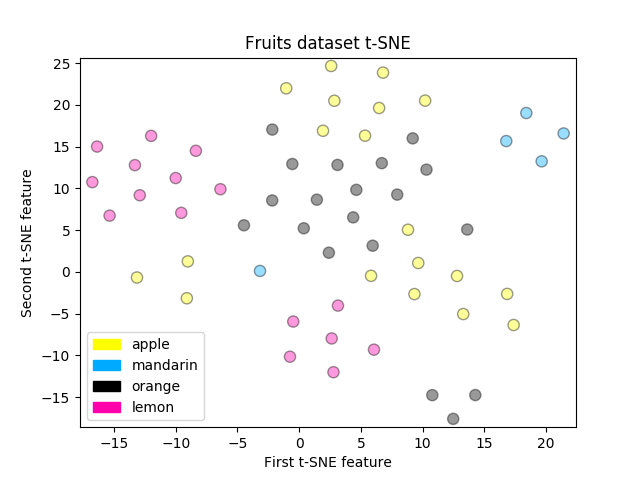

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y_fruits, 
    ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE');

#### t-SNE on the breast cancer dataset

<IPython.core.display.Javascript object>


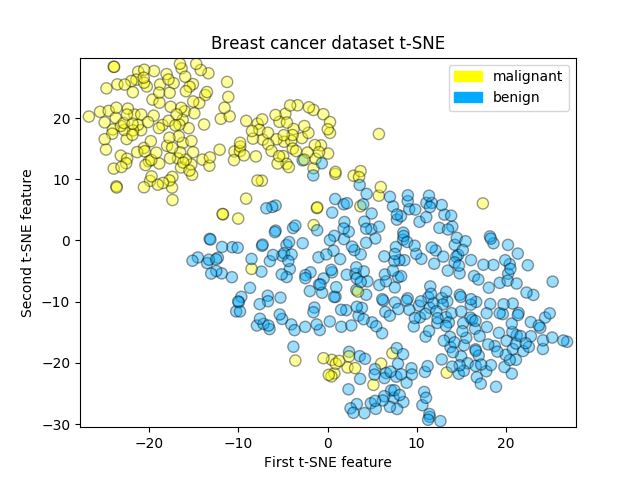

In [0]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');

## Clustering

![image.png](attachment:image.png)

### K-means

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

This example from the lecture video creates an artificial dataset with make_blobs, then applies k-means to find 3 clusters, and plots the points in each cluster identified by a corresponding color.

<IPython.core.display.Javascript object>


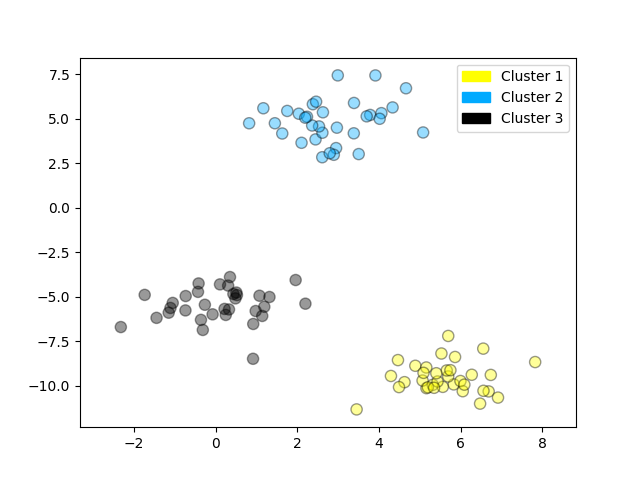

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


Example showing k-means used to find 4 clusters in the fruits dataset.  Note that in general, it's important to scale the individual features before applying k-means clustering.

<IPython.core.display.Javascript object>


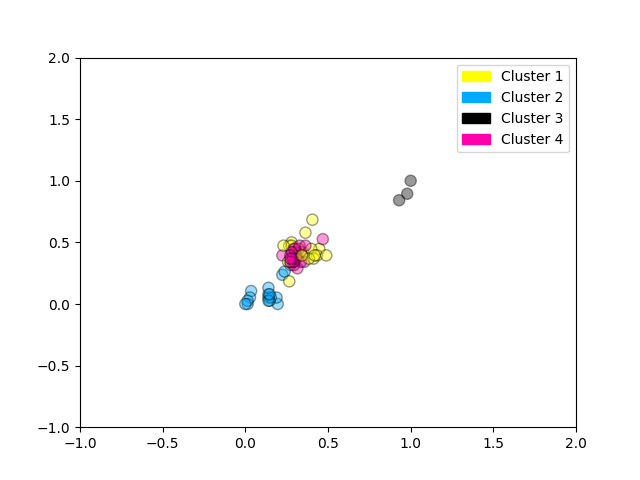

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].as_matrix()
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits_normalized)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

![image.png](attachment:image.png)

### Agglomerative clustering

![image.png](attachment:image.png)

![image.png](attachment:image.png)

<IPython.core.display.Javascript object>


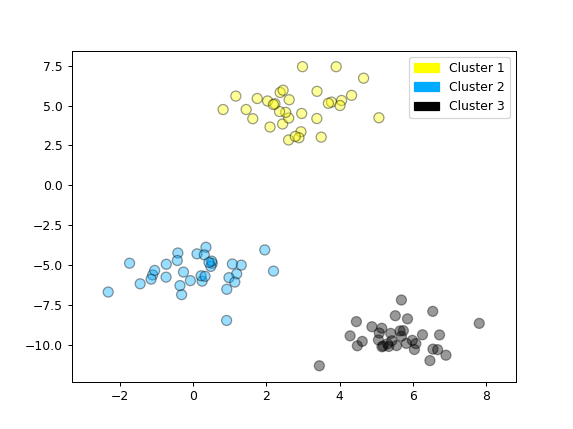

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

#### Creating a dendrogram (using scipy)

![image.png](attachment:image.png)

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example, as plotted here:

<IPython.core.display.Javascript object>


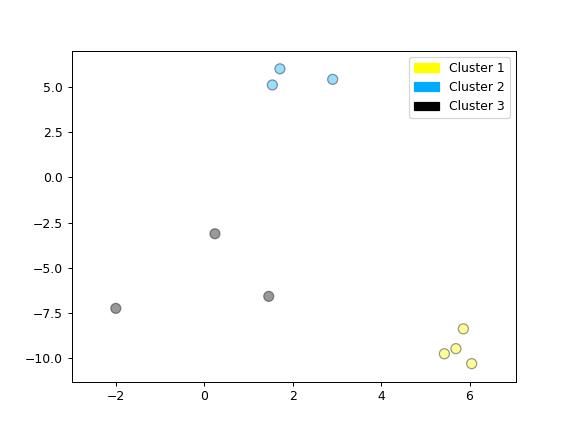

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [0]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

<IPython.core.display.Javascript object>


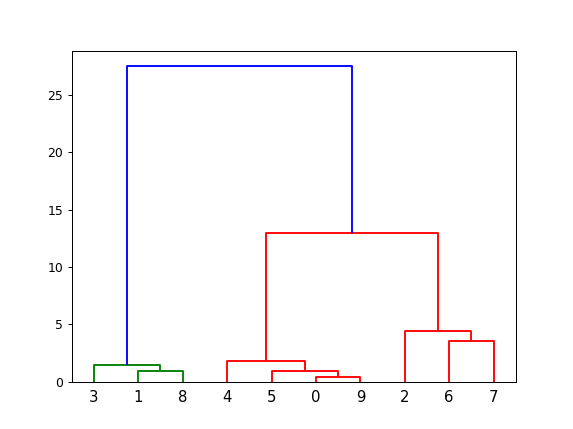

In [0]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

### DBSCAN clustering

![image.png](attachment:image.png)

Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2  1]


<IPython.core.display.Javascript object>


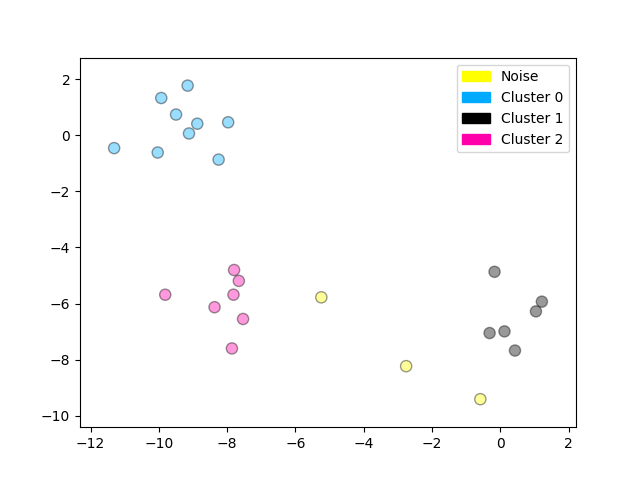

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

![image.png](attachment:image.png)